In [97]:
import gymnasium as gym
import matplotlib.pyplot as plt

from src.Agent import PPOAgent

In [98]:
rng_seed = 0
env = gym.make('CartPole-v1')

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

gamma = 0.99
lmbda = 0.925
epsilon = 0.2  
policy_lr = 0.001
value_lr = 0.001
num_policy_epochs = 5
num_value_epochs = 5
smoothing_const = 1e-8
normalize_advantages = True
batch_size = 32
shuffle_batches = False

Agent = PPOAgent(env=env,
                 state_space_size=input_dim,
                 action_space_size=output_dim,
                 gamma=gamma,
                 lmbda=lmbda,
                 epsilon=epsilon,
                 smooting_const=smoothing_const,
                 normalize_advantages=normalize_advantages,
                 batch_size=batch_size,
                 shuffle_batches = shuffle_batches,
                 seed=rng_seed)

In [99]:
# Trying to interact w. env. before training
Agent.play(render=False)

####################################
# --- Survived for: 11 episodes --- #
####################################


In [100]:
num_episodes = 181
accumulated_reward = Agent.train(episodes=num_episodes,
                                 policy_lr=policy_lr,
                                 value_lr=value_lr,
                                 num_policy_epochs=num_policy_epochs,
                                 num_value_epochs=num_value_epochs)

100%|██████████| 181/181 [05:50<00:00,  1.94s/it]


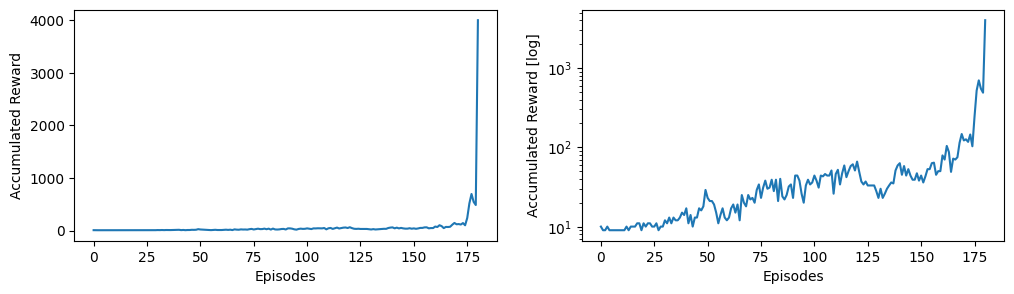

In [106]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
ax[0].plot([e for e in range(len(accumulated_reward))], accumulated_reward)
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Accumulated Reward')

ax[1].plot([e for e in range(len(accumulated_reward))], accumulated_reward)
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Accumulated Reward [log]')

ax[1].set_yscale('log')
plt.show()

In [102]:
# Trying to interact w. env. after training
Agent.play(render=False)

####################################
# --- Survived for: 4080 episodes --- #
####################################
